# PIK3CA: Effects of Hotspot Mutation on AKT2

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.stats.multitest

### Import CPTAC

In [2]:
import CPTAC

Loading CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [3]:
somatic = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

In [4]:
protein = 'AKT2'
gene = 'PIK3CA'

## Extract the data for hotspot mutations only 

In [5]:
#A list of mutations present in the hotspot according to our Hotspot3D output
hotspot_mutations = ['p.E545A', 'p.E545K', 'p.E545V', 'p.Q546P', 'p.Q546R', 'p.E542K']
mutated_hotspot = somatic.loc[(somatic['Location'].isin(hotspot_mutations)) & (somatic['Gene'] == gene)]
hotspot_patients = mutated_hotspot['Clinical_Patient_Key']

In [6]:
p10_mutations = CPTAC.compare_mutations(proteomics, protein, gene)
#print(p10_mutations)
p10_mutations['Within_Hotspot'] = False
p10_mutations.loc[hotspot_patients, 'Within_Hotspot'] = True
p10_mutations.loc[p10_mutations['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
p10_mutations = p10_mutations.loc[p10_mutations['Patient_Type'] == 'Tumor'].dropna(axis=0)
print(len(p10_mutations.loc[(p10_mutations['Within_Hotspot'] == True)]))

19


## Hotspot mutation vs non-hotspot mutation

In [7]:
in_hotspot = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
out_hotspot = p10_mutations.loc[p10_mutations['Within_Hotspot'] == False]
ttest = scipy.stats.ttest_ind(in_hotspot[protein], out_hotspot[protein])
print(ttest)

Ttest_indResult(statistic=-1.1779818628869567, pvalue=0.24486222824644044)


## Hotspot mutation vs other mutations and wildtype

In [8]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] != True]
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=-2.344126107122754, pvalue=0.021090262225409967)


## All mutations vs wildtype

In [9]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] != 'Wildtype']
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] == 'Wildtype']
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=-2.9661965552998892, pvalue=0.0037875613802568534)


## Hotspot mutation v wildtype

In [10]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] == 'Wildtype']
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=-2.8140617355831394, pvalue=0.006368651254182193)


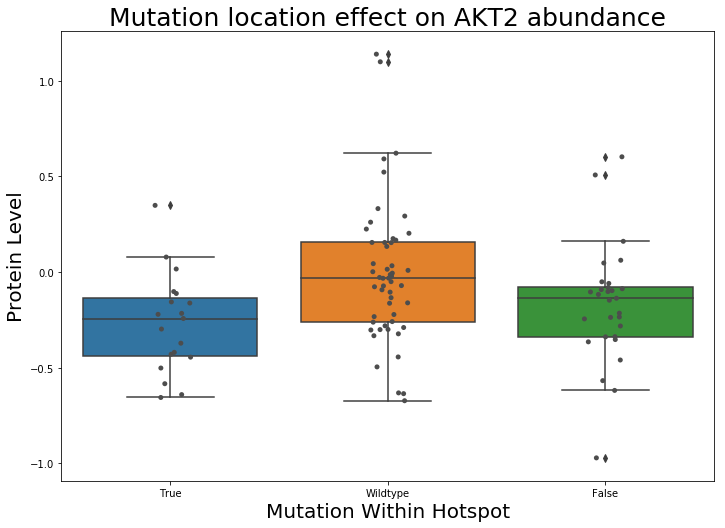

In [11]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = p10_mutations, x = 'Within_Hotspot', y = protein, ax = ax)
boxplt = sns.stripplot(data = p10_mutations, x = 'Within_Hotspot', y = protein, jitter = True, color = '.3')
boxplt.set_title('Mutation location effect on AKT2 abundance', fontsize='25')
boxplt.set_xlabel('Mutation Within Hotspot', fontsize='20')
boxplt.set_ylabel('Protein Level', fontsize='20')
plt.show()

# Phosphoproteomic Abundance

In [12]:
phos_mutations = CPTAC.compare_mutations(phos, protein, gene)
phos_mutations['Within_Hotspot'] = False
phos_mutations.loc[hotspot_patients, 'Within_Hotspot'] = True

phos_mutations.loc[phos_mutations['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
print(phos_mutations)


phos_mutations = phos_mutations.loc[phos_mutations['Patient_Type'] == 'Tumor']
#phos_mutations = phos_mutations.dropna(axis = 0)
#print(phos_mutations)
phos_sites = list(phos_mutations)
phos_sites = phos_sites[:(len(phos_sites) - 3)]

      AKT2-S126  AKT2-S128  AKT2-S302  AKT2-S34  AKT2-S474  AKT2-T133  \
S001   -0.02190        NaN        NaN   -0.0693        NaN        NaN   
S002    0.00737     0.7770     2.6300   -0.0759        NaN     0.7770   
S003        NaN        NaN        NaN   -0.4910        NaN        NaN   
S004        NaN     0.6590        NaN       NaN        NaN        NaN   
S005        NaN        NaN        NaN    0.4300        NaN        NaN   
S006   -0.01060    -0.4450        NaN   -1.7000        NaN        NaN   
S007   -0.52600     0.6380     0.0256   -0.7980        NaN     0.6380   
S008   -0.14400        NaN        NaN       NaN        NaN        NaN   
S009        NaN     0.7180        NaN       NaN        NaN        NaN   
S010   -0.31700    -0.5440        NaN   -1.1100        NaN        NaN   
S011        NaN    -0.0207        NaN    0.2220        NaN        NaN   
S012   -0.19700        NaN        NaN       NaN        NaN        NaN   
S013   -0.07550        NaN        NaN   -0.2470    

## Hotspot mutation vs non-hotspot mutation

In [13]:
for site in phos_sites:
    mutated = phos_mutations.loc[phos_mutations['Within_Hotspot'] == True]
    mutated_list = mutated[site].tolist()
    mutated_list = [x for x in mutated_list if str(x) != 'nan']
    #print(mutated_list)
    wt = phos_mutations.loc[phos_mutations['Within_Hotspot'] == False]
    wt_list = wt[site].tolist()
    wt_list = [x for x in wt_list if str(x) != 'nan']
    
    ttest = scipy.stats.ttest_ind(mutated_list, wt_list)
    print("Test for " + site, ttest)

Test for AKT2-S126 Ttest_indResult(statistic=-0.1347620549642415, pvalue=0.89459166899188)
Test for AKT2-S128 Ttest_indResult(statistic=-0.8446163437174735, pvalue=0.4135991850005273)
Test for AKT2-S302 Ttest_indResult(statistic=nan, pvalue=nan)
Test for AKT2-S34 Ttest_indResult(statistic=-1.010451372930637, pvalue=0.319630979575901)
Test for AKT2-S474 Ttest_indResult(statistic=nan, pvalue=nan)
Test for AKT2-T133 Ttest_indResult(statistic=nan, pvalue=nan)
Test for AKT2-T449 Ttest_indResult(statistic=nan, pvalue=nan)
Test for AKT2-T451 Ttest_indResult(statistic=1.0906268990990822, pvalue=0.2819635226127728)


/Users/emilyhosk/anaconda3/envs/research/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/emilyhosk/anaconda3/envs/research/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Hotspot mutation vs other mutations and wildtype

In [14]:
for site in phos_sites:
    mutated = phos_mutations.loc[phos_mutations['Within_Hotspot'] == True]
    mutated_list = mutated[site].tolist()
    mutated_list = [x for x in mutated_list if str(x) != 'nan']
    #print(mutated_list)
    wt = phos_mutations.loc[phos_mutations['Within_Hotspot'] != True]
    wt_list = wt[site].tolist()
    wt_list = [x for x in wt_list if str(x) != 'nan']
    
    ttest = scipy.stats.ttest_ind(mutated_list, wt_list)
    print("Test for " + site, ttest)

Test for AKT2-S126 Ttest_indResult(statistic=-0.27300239660283765, pvalue=0.7865526110086466)
Test for AKT2-S128 Ttest_indResult(statistic=-0.7357678537126036, pvalue=0.4675860563082218)
Test for AKT2-S302 Ttest_indResult(statistic=nan, pvalue=nan)
Test for AKT2-S34 Ttest_indResult(statistic=-0.6667547786600381, pvalue=0.5070598681158256)
Test for AKT2-S474 Ttest_indResult(statistic=nan, pvalue=nan)
Test for AKT2-T133 Ttest_indResult(statistic=nan, pvalue=nan)
Test for AKT2-T449 Ttest_indResult(statistic=0.9831605594669796, pvalue=0.370678445218241)
Test for AKT2-T451 Ttest_indResult(statistic=1.1763423844570884, pvalue=0.24274206372627125)


## All mutations vs wildtype

In [15]:
for site in phos_sites:
    mutated = phos_mutations.loc[phos_mutations['Within_Hotspot'] != 'Wildtype']
    mutated_list = mutated[site].tolist()
    mutated_list = [x for x in mutated_list if str(x) != 'nan']
    #print(mutated_list)
    wt = phos_mutations.loc[phos_mutations['Within_Hotspot'] == 'Wildtype']
    wt_list = wt[site].tolist()
    wt_list = [x for x in wt_list if str(x) != 'nan']
    
    ttest = scipy.stats.ttest_ind(mutated_list, wt_list)
    print("Test for " + site, ttest)

Test for AKT2-S126 Ttest_indResult(statistic=-0.2517645453293995, pvalue=0.8027844144548926)
Test for AKT2-S128 Ttest_indResult(statistic=-0.37348448611788326, pvalue=0.7114142569392136)
Test for AKT2-S302 Ttest_indResult(statistic=-0.49417187602007545, pvalue=0.6330214645655927)
Test for AKT2-S34 Ttest_indResult(statistic=0.4732471673179616, pvalue=0.6374685369343371)
Test for AKT2-S474 Ttest_indResult(statistic=0.2924321164138885, pvalue=0.7844976280163041)
Test for AKT2-T133 Ttest_indResult(statistic=nan, pvalue=nan)
Test for AKT2-T449 Ttest_indResult(statistic=1.3380165693240513, pvalue=0.2385155179374748)
Test for AKT2-T451 Ttest_indResult(statistic=0.5995198034925314, pvalue=0.5504210594054553)


## Hotspot mutation v wildtype

In [16]:
for site in phos_sites:
    mutated = phos_mutations.loc[phos_mutations['Within_Hotspot'] == True]
    mutated_list = mutated[site].tolist()
    mutated_list = [x for x in mutated_list if str(x) != 'nan']
    #print(mutated_list)
    wt = phos_mutations.loc[phos_mutations['Within_Hotspot'] == 'Wildtype']
    wt_list = wt[site].tolist()
    wt_list = [x for x in wt_list if str(x) != 'nan']
    
    ttest = scipy.stats.ttest_ind(mutated_list, wt_list)
    print("Test for " + site, ttest)

Test for AKT2-S126 Ttest_indResult(statistic=-0.28469648816357224, pvalue=0.7782217291888118)
Test for AKT2-S128 Ttest_indResult(statistic=-0.6271696628861482, pvalue=0.5373079220893686)
Test for AKT2-S302 Ttest_indResult(statistic=nan, pvalue=nan)
Test for AKT2-S34 Ttest_indResult(statistic=-0.3605014494230533, pvalue=0.7200216223382738)
Test for AKT2-S474 Ttest_indResult(statistic=nan, pvalue=nan)
Test for AKT2-T133 Ttest_indResult(statistic=nan, pvalue=nan)
Test for AKT2-T449 Ttest_indResult(statistic=1.1416667466369752, pvalue=0.317295642743204)
Test for AKT2-T451 Ttest_indResult(statistic=1.097961757947603, pvalue=0.2765362809180764)
